Chi square test is carried out to check whether a given class is depend on the features/attributes selected. We can verify the hypothesis that we defined for each feature, using this test.

Lets carry out tests for each feature.

## Feature 1 - Links in Meta, Script, Link tag

In [109]:
import pandas as pd #import pandas
import numpy as np #import numpy
import matplotlib.pyplot as plt #import matplotlib
from scipy.stats import chi2_contingency #import chi2_contigency for chi2␣ independency tet
from matplotlib import style
style.use('ggplot')

In [110]:
df = pd.read_csv('dataset1.csv')

df.drop('url',axis=1,inplace=True)
df.head()


,links_in_tags,abnormal_subdomain,submit_email,sfh,iframe,popup_window,onmouseover,right_clic,nb_redirection,status
0,73.913043,0,0,0,0,0,0,0,0,-1
1,85.000000,0,0,0,0,0,0,0,0,-1
2,97.000000,0,0,0,0,0,0,0,1,-1
3,12.000000,0,0,0,0,0,0,0,0,1
4,55.555556,0,0,0,0,0,0,0,0,1


Here, we have to check whether the website status is depend on feature 1 (links in meta tags)

In [111]:
df1 = df[['links_in_tags','status']]
df1.head()

,links_in_tags,status
0,73.913043,-1
1,85.000000,-1
2,97.000000,-1
3,12.000000,1
4,55.555556,1


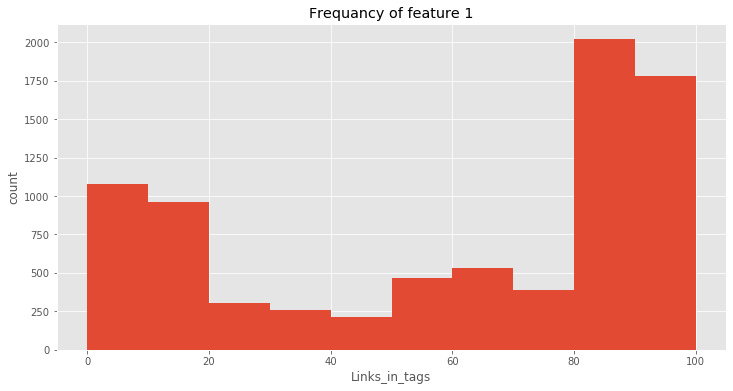

In [112]:
#Let's plot and check the frequency of links_in_tags feature

plt.figure(figsize=(12,6))  
plt.hist(df1['links_in_tags'])   
plt.title('Frequancy of feature 1')
plt.xlabel('Links_in_tags')       
plt.ylabel('count')       
plt.show()

In [113]:
#crosstab to check the website status and page rank.
# to get a better vissualization we will round off the values into nearest 10
df1_new = df1.copy()

df1_new.links_in_tags = df1.links_in_tags.round(-1)

cross_tab = pd.crosstab(df1_new['links_in_tags'],df1_new['status']).T
cross_tab

links_in_tags,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0
status,,,,,,,,,,,
-1,18,93,70,92,59,126,65,111,960,1520,884
1,576,983,532,178,166,261,293,326,404,282,0


phishing websites indicated by -1


legitimate websites indicated by 1

####  statstical method to check whether the website's status dependent on feature 1 or not.

In [114]:
#H0 : website status is independent of feature1
#H1 : website status depends on feature1
#Alpha : 0.05
alpha = 0.05

stats,p_value,degrees_of_freedom,expected = chi2_contingency(cross_tab)
if p_value > alpha:
  print(f' Accept Null Hypothesis\n P-Value is {p_value}\n Website status is Independent of feature1')
else:
  print(f' Reject Null Hypothesis\n P-Value is {p_value}\n Website status depends on feature1')

 Reject Null Hypothesis
 P-Value is 0.0
 Website status depends on feature1


Chi2 independency test tells us that the links in tags are not independent of status. We can
also check it using

In [115]:
phishing_df = df1[df1['status']==-1]  #store all the phishing websites in a phishing
legitimate_df = df1[df1['status']==1]  #store all the legitimate websites in a legitimate

In [116]:
phishing_df.head()

,links_in_tags,status
0,73.913043,-1
1,85.000000,-1
2,97.000000,-1
5,81.000000,-1
6,86.000000,-1


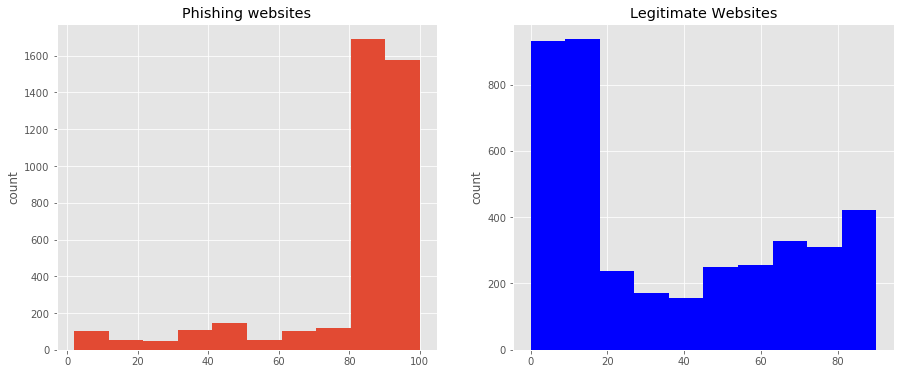

In [124]:
#plot different histograms for phishing and legitmate websites
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

phishing_df['links_in_tags'].hist(ax=ax1)
ax1.set_title('Phishing websites')
ax1.set_ylabel('count')

legitimate_df['links_in_tags'].hist(ax=ax2,color='blue')
ax2.set_title('Legitimate Websites')
ax2.set_ylabel('count')

plt.show()

In [118]:
# According to the first graph, you can clearly see the links in tag percentage greater than 85 are most likely to be phishing
# According to the second graph, you can clearly see the links in tag percentage less than 20 are most likely to be legitimate


## Feature 2 - Abnormal URL

In [ ]:
# final dataset eke data ditribution eka balala, a gaanata set wennah, dataset1 eke abnormal url values wenas karnna